# Importación de datos



In [37]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Agrupamos las tiendas en un diccionario
tiendas = {"Tienda 1": pd.read_csv(url),
           "Tienda 2": pd.read_csv(url2),
           "Tienda 3": pd.read_csv(url3),
           "Tienda 4": pd.read_csv(url4)}
tiendas["Tienda 1"].head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Creación de un DataFrame para almacenar los analisis[texto del enlace](https://)

In [38]:
analisisTiendas= pd.DataFrame()
analisisTiendas["Tienda"] = tiendas.keys()
analisisTiendas

,Tienda
0,Tienda 1
1,Tienda 2
2,Tienda 3
3,Tienda 4


# Analisis

## Calcular el ingreso total de cada tienda



In [39]:
analisisTiendas["Ingreso Total"] = [float(round(tiendas["Tienda " + str(i)]["Precio"].sum(), 2)) for i in range(1,5)]
analisisTiendas

,Tienda,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


## Calcular calificación promedio de cada tienda

In [41]:
analisisTiendas["Calificación"] = [round(tiendas["Tienda " + str(i)]["Calificación"].mean(), 2) for i in range(1, 5)]
analisisTiendas

,Tienda,Ingreso Total,Calificación
0,Tienda 1,1.150880e+09,3.98
1,Tienda 2,1.116344e+09,4.04
2,Tienda 3,1.098020e+09,4.05
3,Tienda 4,1.038376e+09,4.00


## 3. Calcular ventas por categoría de cada tienda
Para no almacenar muchos valores en una sola fila, se creara un DataFrame aparte que contendra las ventas por categoria de cada tienda.

### Funcion en común con el punto 4
Como se tiene que contar en ambas pero lo unico que cambia es la columna, se define una funcion que recibira el nombre de la columna a contar y el nombre que representaran a lo que se conto

In [144]:
def contarYGenerarDataFrame(listadoNombreTiendas, columnaAProcesar, nombreNuevaColumna):
  # Almacenara los valores de cada iteracion
  lista = []
  for nombreTienda in listadoNombreTiendas:
    df_temp = (
        tiendas[nombreTienda][columnaAProcesar]
        .value_counts()
        .reset_index()
        .rename(columns={"count": nombreNuevaColumna})
    )
    df_temp["Tienda"] = nombreTienda  # agregar columna de tienda
    lista.append(df_temp)

  # unir todos los DataFrames en uno solo
  return pd.concat(lista, ignore_index=True)

In [147]:
ventas_por_categorias = contarYGenerarDataFrame(tiendas.keys(), "Categoría del Producto", "Ventas")
ventas_por_categorias.sample(6)

,Categoría del Producto,Ventas,Tienda
20,Deportes y diversión,277,Tienda 3
9,Electrónicos,422,Tienda 2
5,Instrumentos musicales,182,Tienda 1
6,Libros,173,Tienda 1
16,Muebles,499,Tienda 3
11,Electrodomésticos,305,Tienda 2


## 4. Calcular productos más y menos vendidos en cada tienda
Se utiliza la funcion definida en el punto 3

In [151]:
ventas_por_productos = contarYGenerarDataFrame(tiendas.keys(), "Producto", "Ventas")
ventas_por_productos.sample(6)

,Producto,Ventas,Tienda
25,Cama box,44,Tienda 1
83,Smartwatch,44,Tienda 2
24,Estufa,45,Tienda 1
69,Vaso térmico,47,Tienda 2
156,Cama king,56,Tienda 4
89,Ciencia de datos con Python,43,Tienda 2


## 5. Calcular envio promedio por tienda

In [88]:
analisisTiendas["Costo promedio de envío"] = [round(float(tiendas["Tienda " + str(i)]["Costo de envío"].mean()), 2) for i in range(1, 5)]
analisisTiendas

,Tienda,Ingreso Total,Calificación,Costo promedio de envio
0,Tienda 1,1.150880e+09,3.98,26018.61
1,Tienda 2,1.116344e+09,4.04,25216.24
2,Tienda 3,1.098020e+09,4.05,24805.68
3,Tienda 4,1.038376e+09,4.00,23459.46


# Definir funciones para graficar

## Funcion para graficar los ingresos totales de cada tienda

In [94]:
def graficarIngresos(unDataFrame):
  idx_min = unDataFrame['Ingreso Total'].idxmin()
  nombreTienda = unDataFrame.loc[idx_min, 'Tienda']
  colores = ['orange' if i == idx_min else 'skyblue' for i in range(len(unDataFrame))]

  # Crear la gráfica
  ax = unDataFrame.plot(
      kind="bar",
      x="Tienda",
      xlabel="",
      y="Ingreso Total",
      legend=False,  # 🔹 Quita el encabezado "Ingreso Total"
      color=colores,
      title="La "+ nombreTienda + " genera menos ingresos"
  )

  # Formatear los números del eje Y
  ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

  # Ajustes opcionales para estética
  ax.set_ylabel("Ingresos")
  plt.tight_layout()
  plt.show()

## Funcion para graficar las calificaciones promedio de cada tienda

In [264]:
def graficarCalificaciones(unDataFrame):
  plt.stem(unDataFrame['Tienda'], unDataFrame['Calificación'])
  plt.title('Valoración media por tienda')
  plt.xlabel('Tienda')
  plt.ylabel('Valoración promedio')
  plt.ylim(3.9, 4.1)  # opcional, para resaltar las diferencias pequeñas
  plt.show()

## Funcion para graficar el costo promedio de envio de cada tienda

In [152]:
def graficarCostoPromedioEnvio(unDataFrame):
  # Buscamos la tienda con el costo mas alto para remarcarla
  idxmax = unDataFrame['Costo promedio de envio'].idxmax()
  tienda_costo_alto_envio = unDataFrame.loc[idxmax, 'Tienda']
  colores = ['orange' if i == idxmax else 'skyblue' for i in range(len(unDataFrame))]

  # Crear la gráfica
  ax = unDataFrame.plot(
      kind="bar",
      x="Tienda",
      grid=True,
      xlabel="",
      y="Costo promedio de envio",
      legend=False,  # 🔹 Quita el encabezado "Ingreso Total"
      color=colores,
      title="La "+ tienda_costo_alto_envio + " tiene el costo de envio mas caro"
  )

  # Ajustes opcionales para estética
  ax.set_ylabel("Costo")
  plt.margins(0.2)
  plt.tight_layout()
  for i in range(len(unDataFrame)):
    plt.text(i, unDataFrame.iloc[i, 3] + 200, str(unDataFrame.iloc[i, 3]), ha="center")
  plt.show()

## Funcion para graficar las ventas por categoria

In [191]:
def mostrarDistribucionDeVentasPorCategoria(unDataFrame):
  for i in range(1,5):
    # Filtramos una tienda
    filtro = unDataFrame["Tienda"] == "Tienda " + str(i)
    df_filtrado = unDataFrame[filtro]
    #Graficamos
    plt.pie(x=df_filtrado["Ventas"],labels=df_filtrado['Categoría del Producto'], autopct='%1.1f%%')
    plt.title('Distribucion de ventas por categoria - Tienda ' + str(i))
    plt.show()
    print("\n")

## Funcion para visualizar los productos más y menos vendidos de cada tienda

In [260]:
def mostrarProductosMasYMenosVendidos(unDataFrame):
  for i in range(1,5):
    # Filtramos una tienda
    filtro = unDataFrame["Tienda"] == "Tienda " + str(i)
    df_filtrado = unDataFrame[filtro]

    # Obtenemos los 3 más y menos vendidos de una tienda
    df_resultado = pd.concat([df_filtrado.head(3), df_filtrado.tail(3)])
    df_resultado = df_resultado.set_index("Producto")
    # Graficamos
    colores = ["green"] * 3 + ["red"] * 3
    ax = df_resultado["Ventas"].plot(
          kind='bar',
          legend=False,
          figsize=(6,7),
          color=colores,
          title=f'Productos más y menos vendidos - Tienda {str(i)}'
      )
    plt.tight_layout()
    plt.margins(0.2)
    for i in range(6):
      plt.text(i, df_resultado.iloc[i,0] + 0.3, str(df_resultado.iloc[i,0]), ha='center')
    plt.show()
    print("\n")

# Graficar resultados

## 1. Ingresos totales

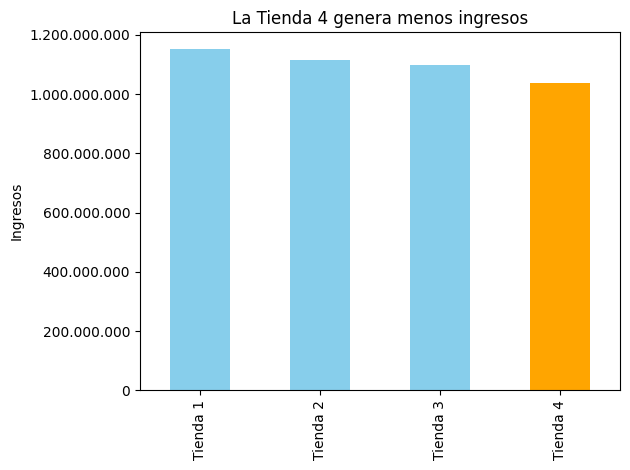

In [262]:
graficarIngresos(analisisTiendas)

## Calificación

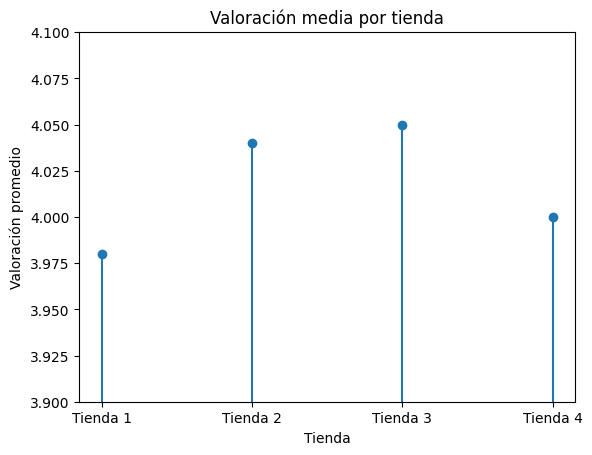

In [265]:
graficarCalificaciones(analisisTiendas)

## Costo promedio de envio

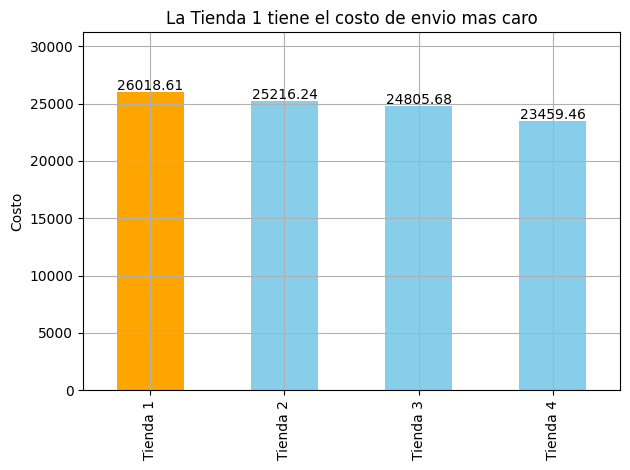

In [266]:
graficarCostoPromedioEnvio(analisisTiendas)

## Ventas por categoria de cada tienda

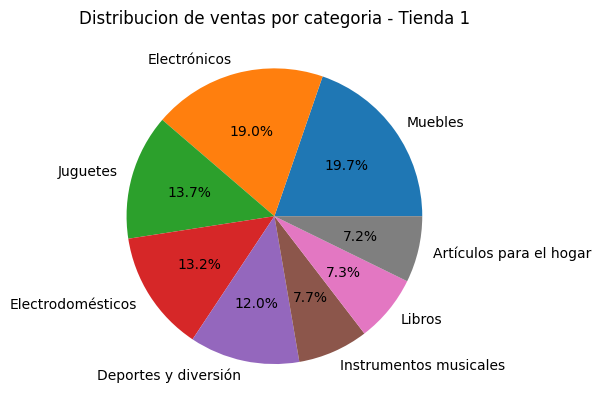

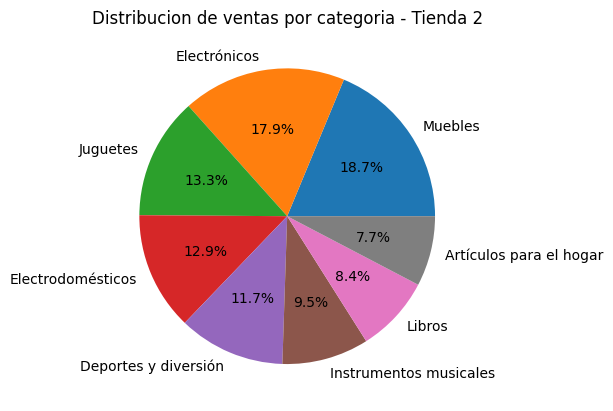

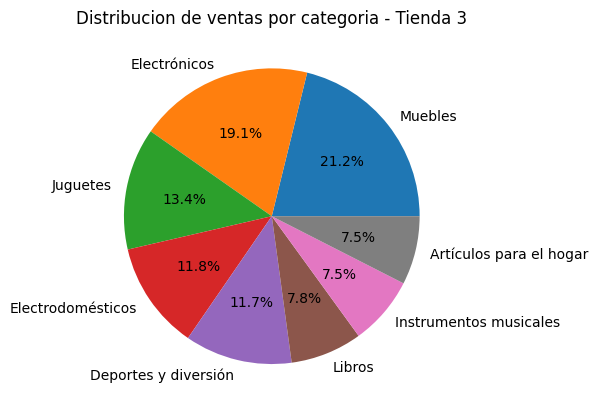

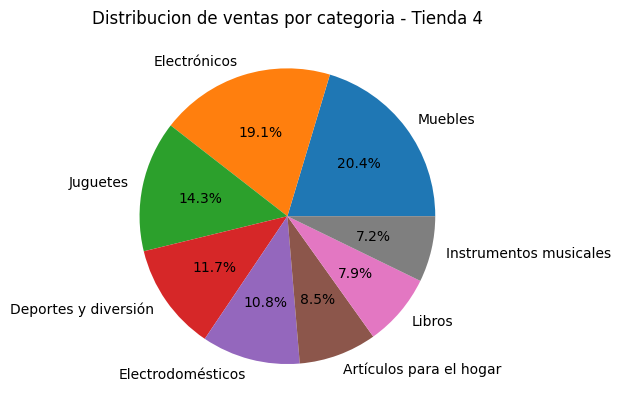

In [268]:
mostrarDistribucionDeVentasPorCategoria(ventas_por_categorias)

## Productos más y menos vendidos de cada tienda

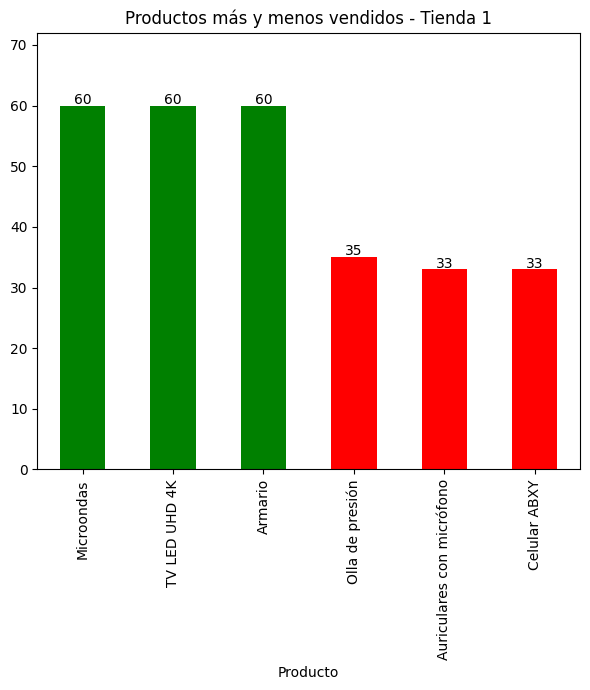

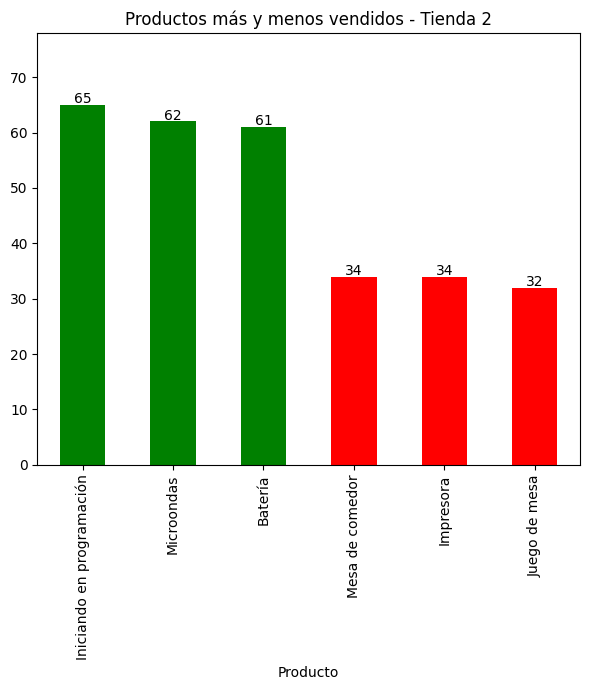

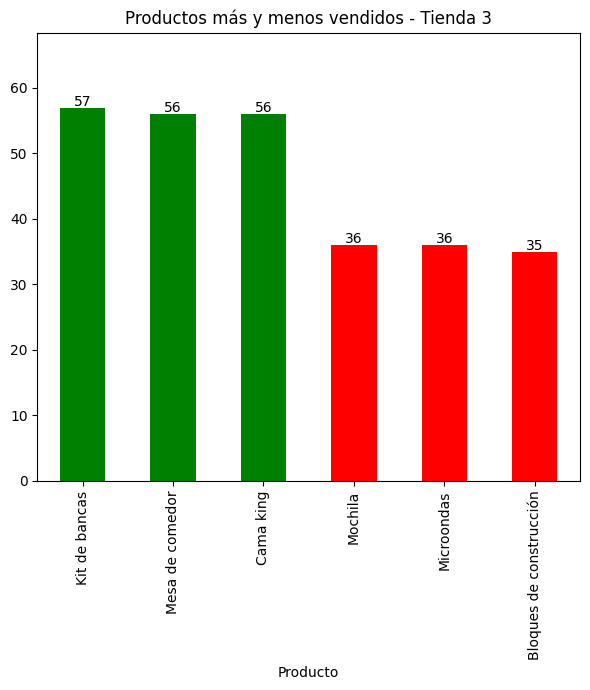

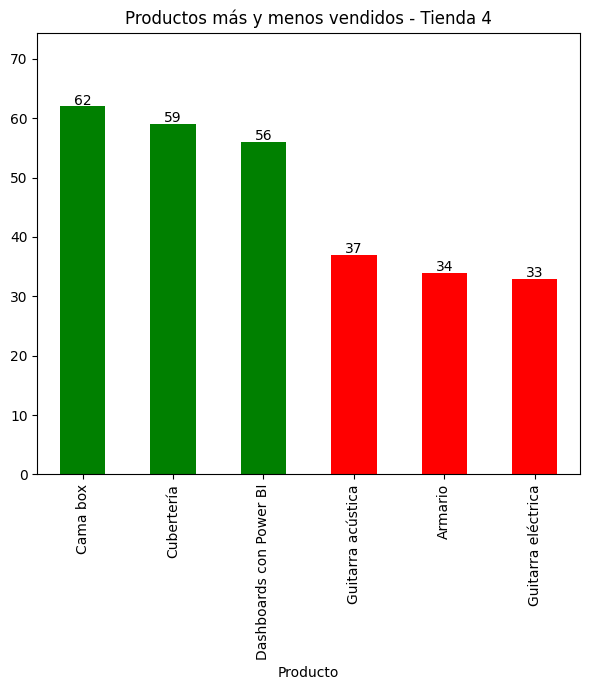

In [269]:
mostrarProductosMasYMenosVendidos(ventas_por_productos)